# Diabetes health prediction

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

Dataset 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download&select=diabetes_012_health_indicators_BRFSS2015.csv

original dataset
https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv


## Import libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import math
from sklearn import metrics
import scipy.cluster.hierarchy as spc
#from statannot import add_stat_annotation

## Import data

In [5]:
dm_data = pd.read_csv('./Data/diabetes_012_health_indicators_BRFSS2015.csv')

## Details of the data 

- 22 columns 
- 253680 rows 

In [6]:
dm_data.shape

(253680, 22)

In [7]:
dm_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Explore data

In [8]:
dm_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
dm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

## Visual exploration 

### Correlation with all variables

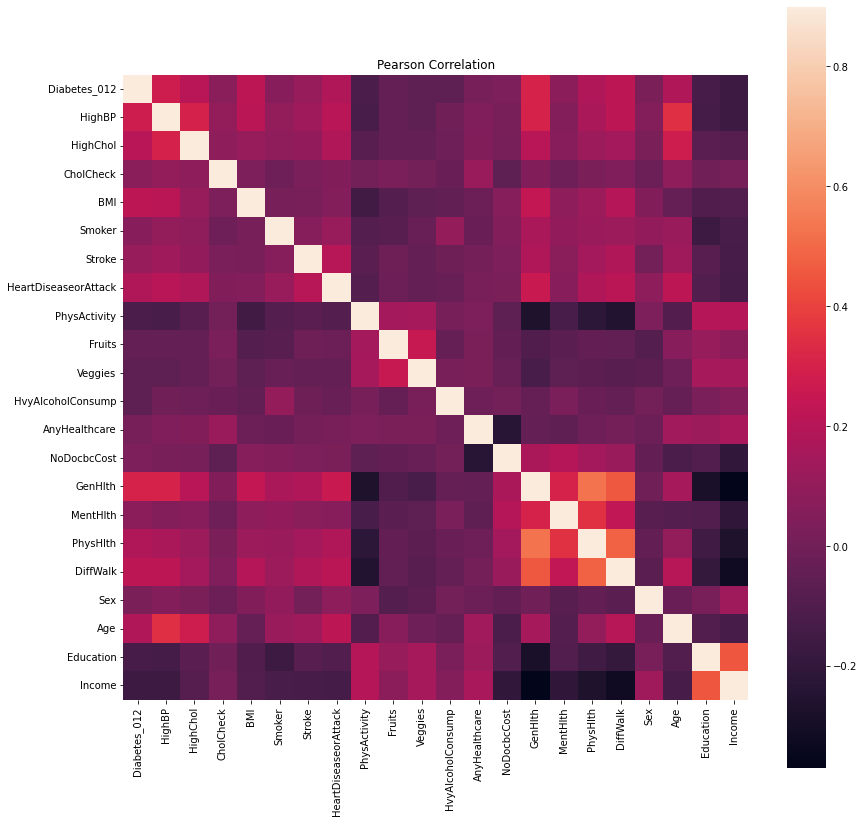

In [10]:
#heatmap correlation
plt.figure(figsize = (14,14))
sns.heatmap(dm_data.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
#plt.show()
plt.savefig("pearson_correlation.jpg")

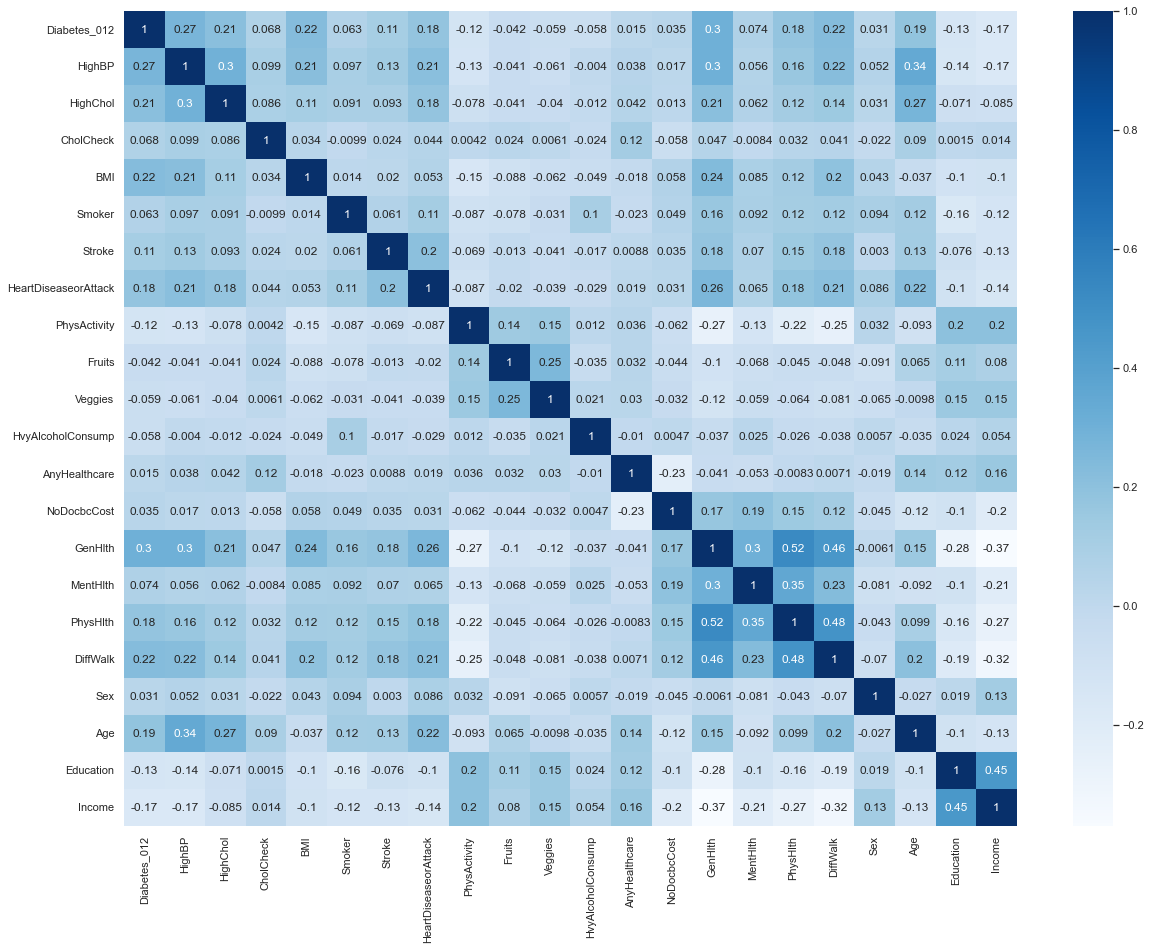

In [11]:
plt.figure(figsize=(20,15))
sns.set_theme(style="white")
corr = dm_data.corr(method='pearson')
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.2g')

plt.savefig("pearson_correlation.numbers.jpg", dpi=400)

In [12]:
upper_corr_mat = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

Income     GenHlth        -0.370014
           DiffWalk       -0.320124
Education  GenHlth        -0.284912
Income     PhysHlth       -0.266799
GenHlth    PhysActivity   -0.266186
                             ...   
PhysHlth   MentHlth        0.353619
Income     Education       0.449106
DiffWalk   GenHlth         0.456920
           PhysHlth        0.478417
PhysHlth   GenHlth         0.524364
Length: 231, dtype: float64


### Correlation with diabetes

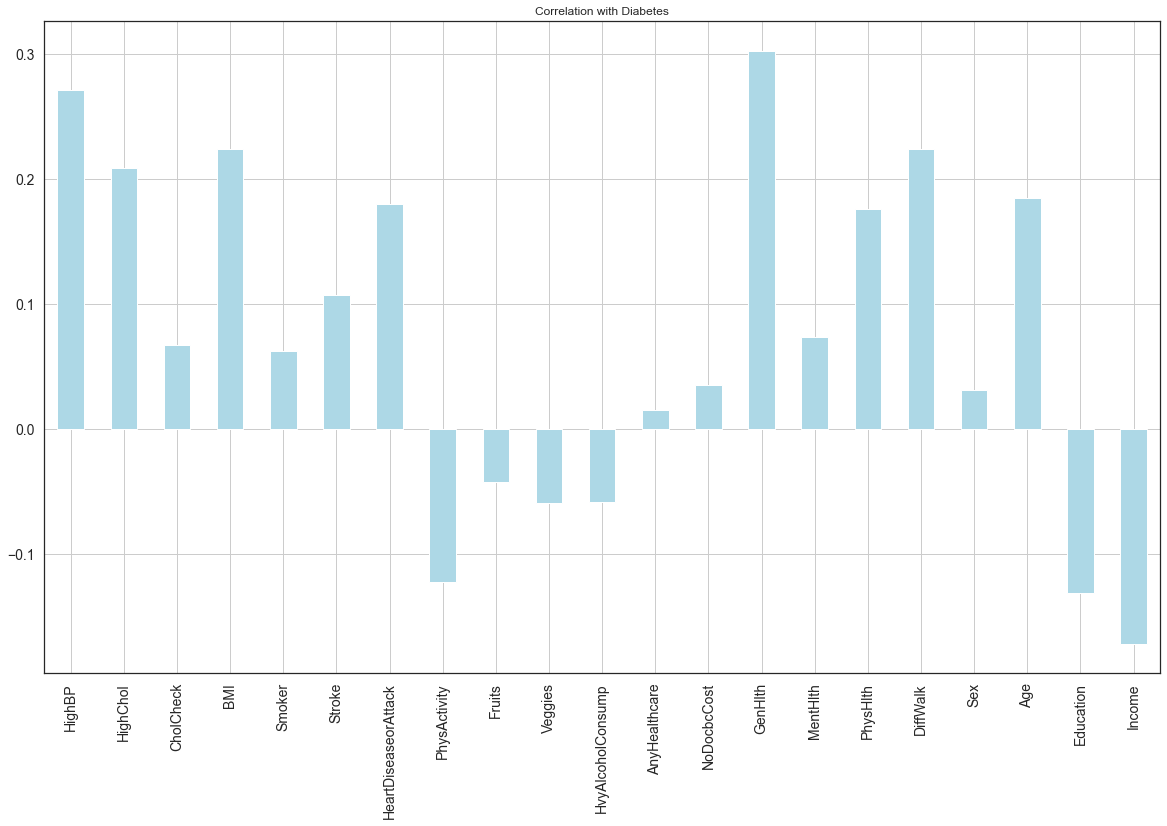

In [13]:

dm_data.drop('Diabetes_012', axis=1).corrwith(dm_data.Diabetes_012).plot(kind='bar', grid=True, fontsize=14, figsize=(20, 12), title="Correlation with Diabetes", color="lightblue");


plt.savefig("pearson_correlation.with_dm.jpg", dpi=400)

In [14]:
##low correlation with AnyHealthCare, NoDocbcCost, Sex
##Highest correlation positive: HighBP, GenHlth, DiffWalk, BMI, HighChol
dm_data.groupby('Diabetes_012').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,0.821439,...,0.949739,0.079610,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
1,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,0.768948,...,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112
2,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', 
           leaf_rotation=90);

NameError: name 'correlations' is not defined

<Figure size 864x360 with 0 Axes>

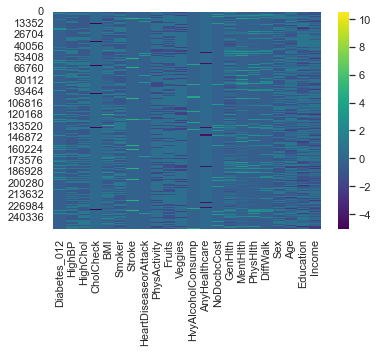

In [16]:
#heatmap normalised by column 
df_norm_col=(dm_data-dm_data.mean())/dm_data.std()
sns.heatmap(df_norm_col, cmap='viridis')
plt.show()

In [17]:
#correlation - pairplot 
#sns.pairplot(data=dm_data, kind="reg")
#plt.show()

In [18]:
## left
#sns.pairplot(data=dm_data, kind="scatter", hue="Diabetes_012", markers=["o", "s", "D"], palette="Set2")
#plt.show()

In [19]:
#sns.pairplot(data=dm_data, kind="hist")

### Incidence of diabetes and prediabetes

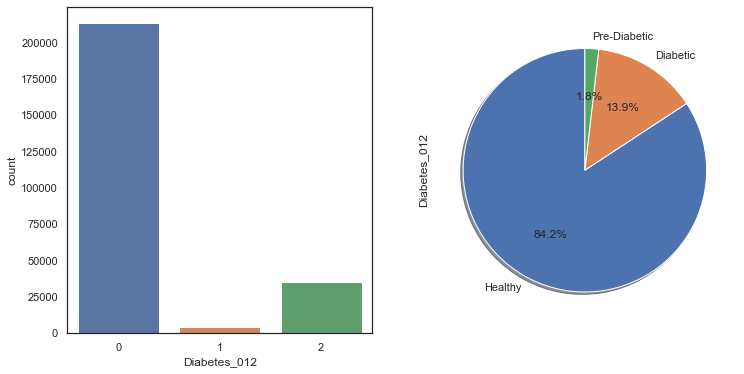

In [20]:
fig1, ax1 = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=dm_data, x = 'Diabetes_012', ax=ax1[0])
#Find the % of diabetic and Healthy person
labels = 'Healthy','Diabetic', 'Pre-Diabetic'
dm_data.Diabetes_012.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.savefig("pre_diab_diab_count.jpg", dpi=400)

### Distribution of variables

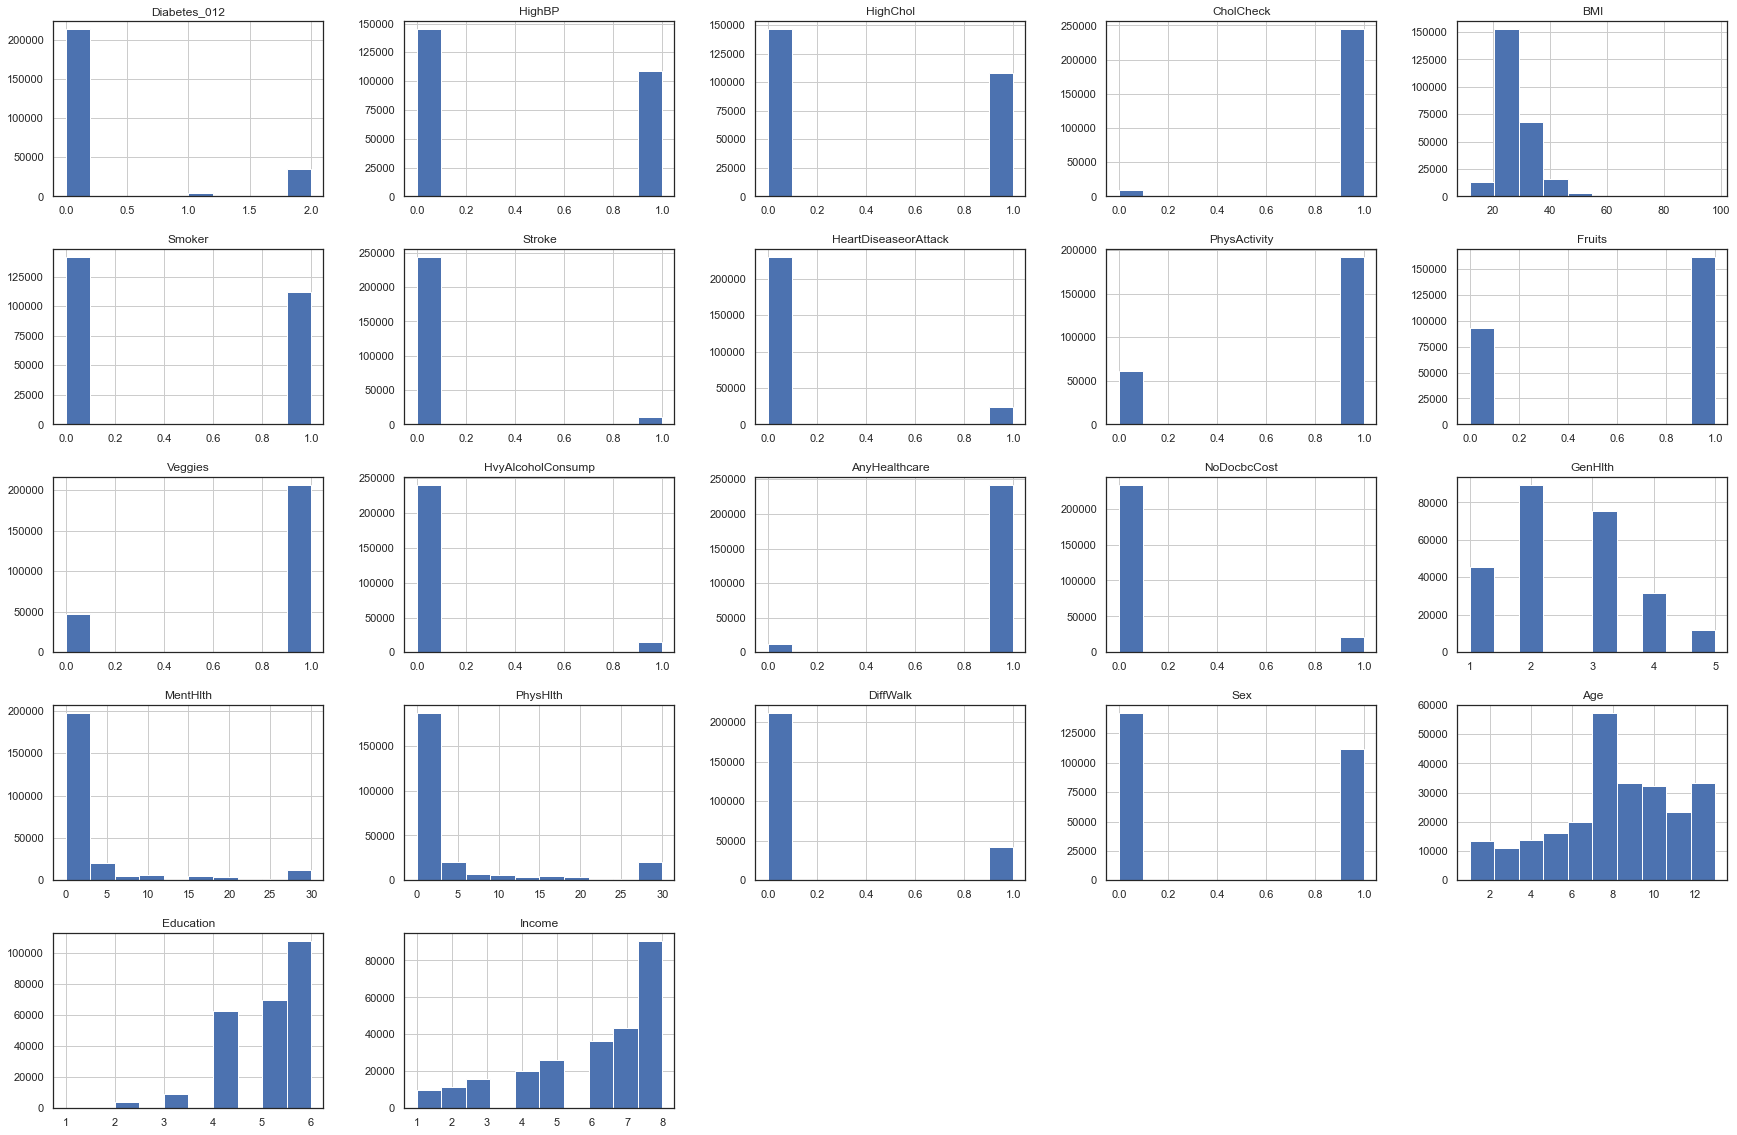

In [21]:
dm_data.hist(figsize=(30,20))
plt.savefig("variables_histogram.jpg", dpi=400)

### Association of Diabetes with variables - granular analysis

In [22]:
#sns.swarmplot(data=dm_data, x = 'Diabetes_012', y='BMI')

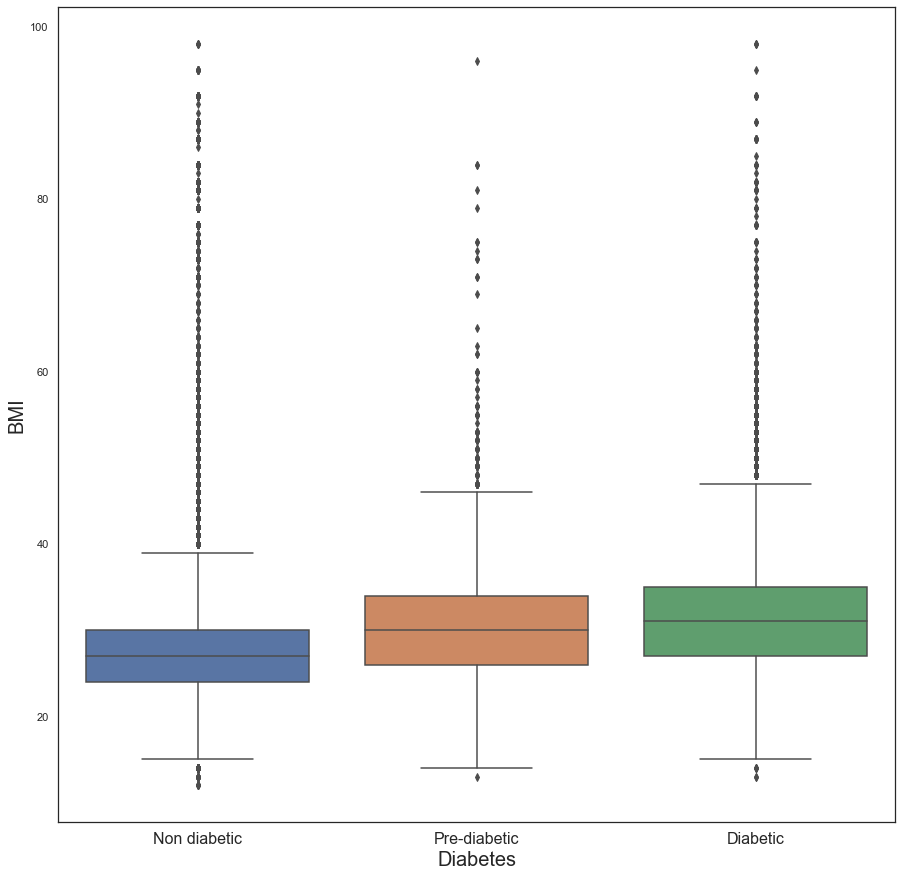

In [23]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dm_data, x = 'Diabetes_012', y='BMI')
plt.xlabel('Diabetes', fontsize=20)
plt.ylabel('BMI', fontsize=20)
plt.xticks([0,1,2],['Non diabetic', 'Pre-diabetic', "Diabetic"], fontsize=16)
plt.savefig("BMI_diabetes_boxplot.jpg", dpi=400)

<AxesSubplot:xlabel='Diabetes_012', ylabel='BMI'>

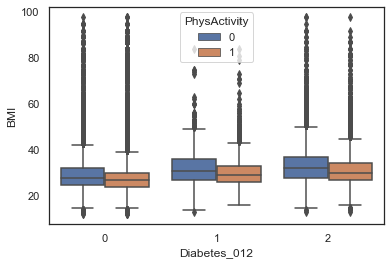

In [24]:
sns.boxplot(data=dm_data, x = 'Diabetes_012', y='BMI', hue='PhysActivity')

<AxesSubplot:xlabel='PhysHlth', ylabel='BMI'>

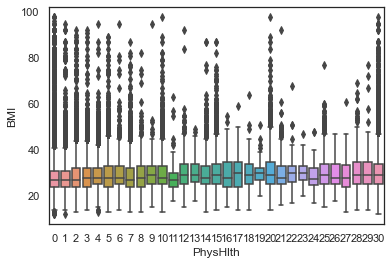

In [25]:
sns.boxplot(data=dm_data, x = 'PhysHlth', y='BMI')#, hue='PhysActivity')

<AxesSubplot:xlabel='PhysHlth', ylabel='BMI'>

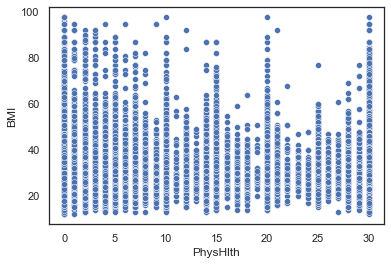

In [26]:
sns.scatterplot(data=dm_data, x = 'PhysHlth', y='BMI')

In [27]:
Income     GenHlth        -0.370014
           DiffWalk       -0.320124
Education  GenHlth        -0.284912
Income     PhysHlth       -0.266799
GenHlth    PhysActivity   -0.266186
                             ...   
PhysHlth   MentHlth        0.353619
Income     Education       0.449106
DiffWalk   GenHlth         0.456920
           PhysHlth        0.478417
PhysHlth   GenHlth         0.524364

SyntaxError: invalid syntax (427124623.py, line 1)

In [ ]:
sns.jointplot(data=dm_data, x = 'PhysHlth', y='BMI')




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


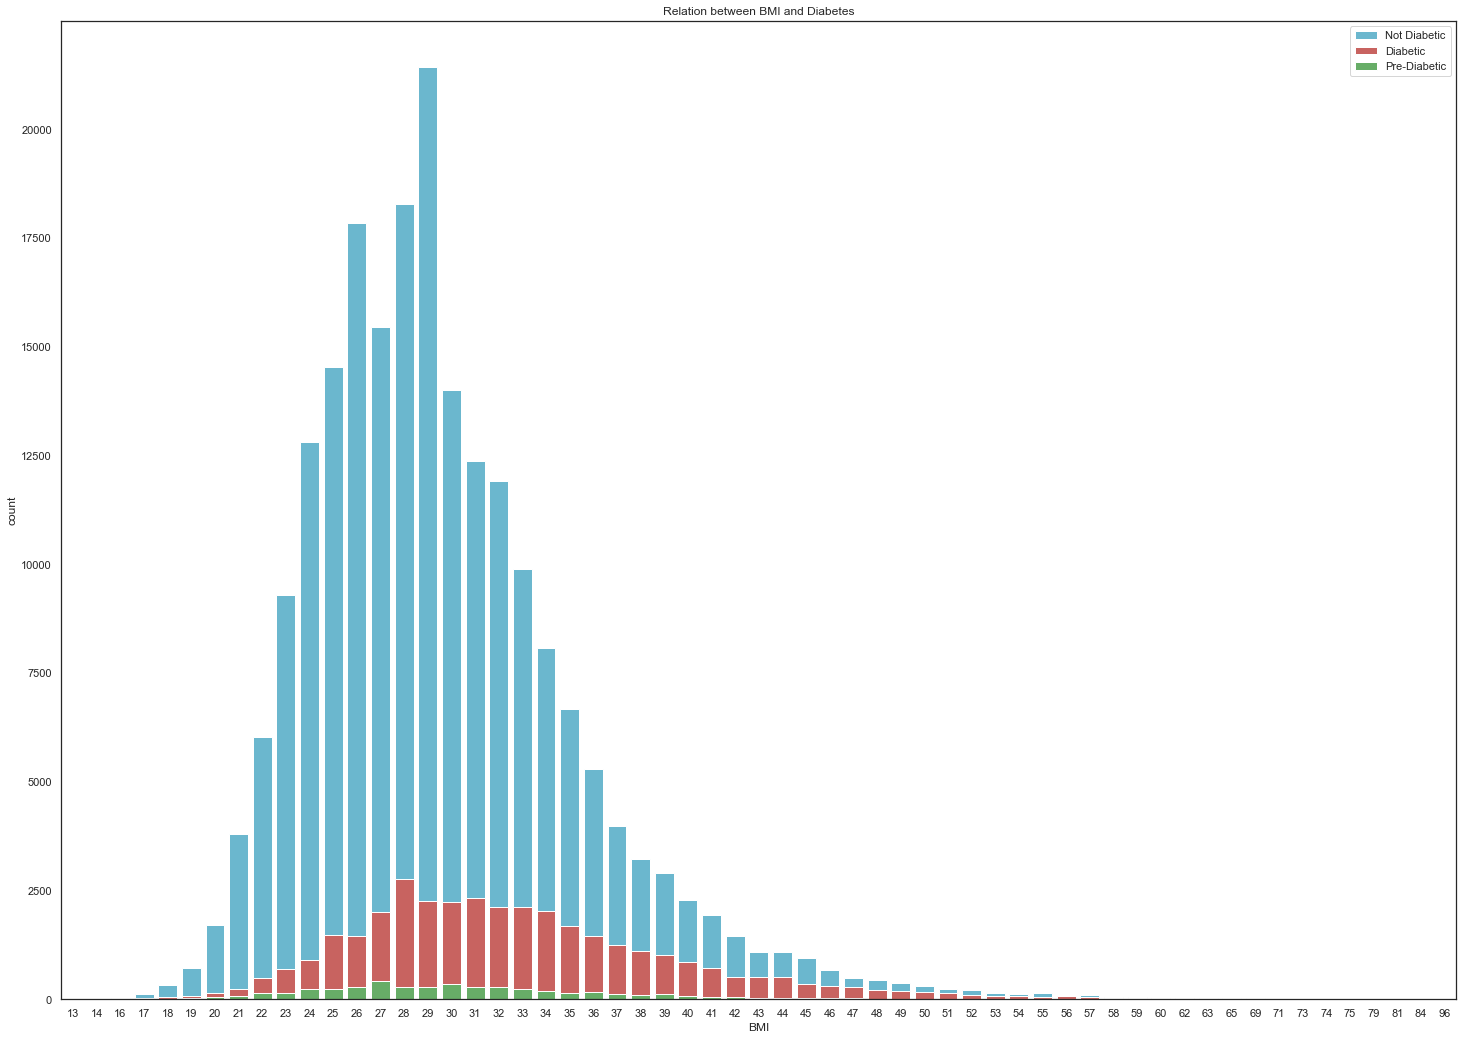

In [28]:
#count plot to see numbers of Diabetic, prediabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(25, 18))


'#5cb85c','#d9534f', '#5bc0de'
sns.countplot(dm_data.BMI[dm_data.Diabetes_012 == 0], color='#5bc0de', label="Not Diabetic");
sns.countplot(dm_data.BMI[dm_data.Diabetes_012 == 2], color='#d9534f', label="Diabetic");
sns.countplot(dm_data.BMI[dm_data.Diabetes_012 == 1], color='#5cb85c', label="Pre-Diabetic");
plt.title("Relation between BMI and Diabetes")

plt.legend()

plt.savefig("BMI_diabetes_histogram.jpg")

In [29]:
#stacked bargraph to 100% 

cross_tab = pd.crosstab(index=dm_data['BMI'],
                        columns=dm_data['Diabetes_012'])
cross_tab

Diabetes_012,0,1,2
BMI,,,
12,6,0,0
13,18,1,2
14,36,1,4
15,120,0,12
16,326,2,20
...,...,...,...
91,1,0,0
92,27,0,5
95,11,0,1


In [30]:
##Proportional table 
#https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

cross_tab_prop = pd.crosstab(index=dm_data['BMI'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop


Diabetes_012,0,1,2
BMI,,,
12,1.000000,0.000000,0.000000
13,0.857143,0.047619,0.095238
14,0.878049,0.024390,0.097561
15,0.909091,0.000000,0.090909
16,0.936782,0.005747,0.057471
...,...,...,...
91,1.000000,0.000000,0.000000
92,0.843750,0.000000,0.156250
95,0.916667,0.000000,0.083333


In [31]:
#Rearrange vs rename columns

#cross_tab_prop = cross_tab_prop.rename(columns={0: 'Not diabetic', 1: 'Pre-diabetic', 2: 'Diabetic'})
cross_tab_prop = cross_tab_prop[[1,2,0]]
cross_tab_prop

Diabetes_012,1,2,0
BMI,,,
12,0.000000,0.000000,1.000000
13,0.047619,0.095238,0.857143
14,0.024390,0.097561,0.878049
15,0.000000,0.090909,0.909091
16,0.005747,0.057471,0.936782
...,...,...,...
91,0.000000,0.000000,1.000000
92,0.000000,0.156250,0.843750
95,0.000000,0.083333,0.916667


<Figure size 1800x1296 with 0 Axes>

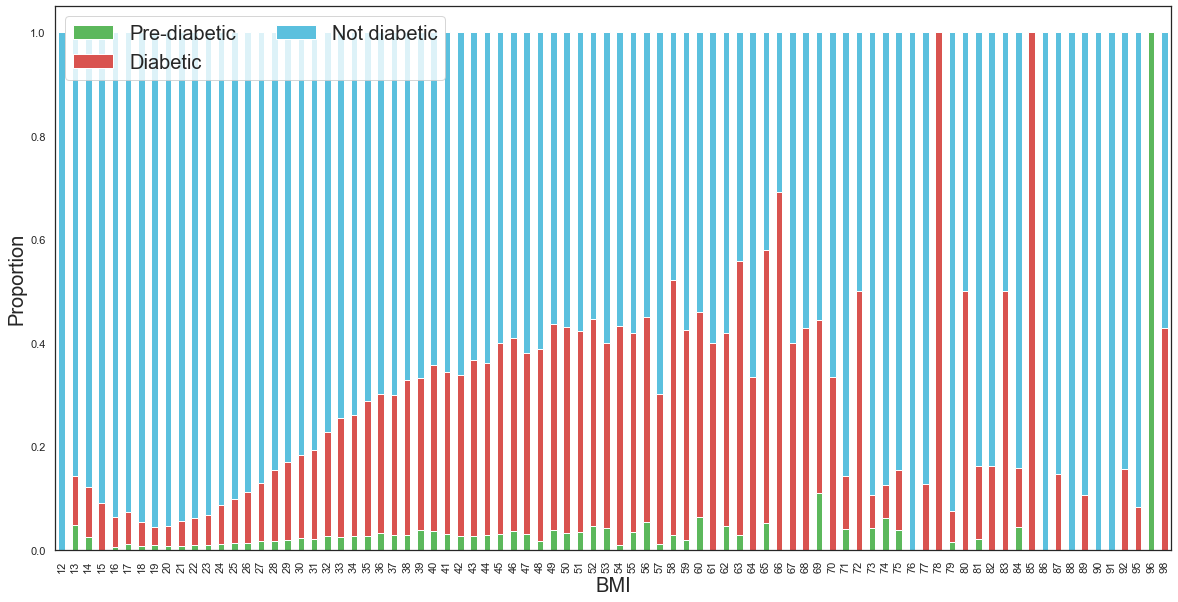

In [32]:

plt.figure(figsize=(25, 18))
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("BMI", fontsize=20)
plt.ylabel("Proportion", fontsize=20)

plt.savefig("BMI_diabetes_stacked_bar_graph.jpg", dpi=400)

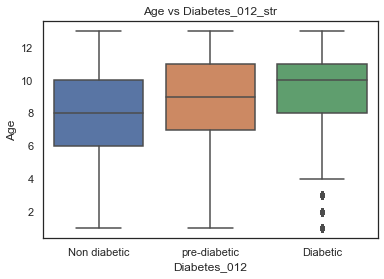

In [33]:
##Age and diabetes

sns.boxplot(x = 'Diabetes_012', y = 'Age', data = dm_data)
plt.title('Age vs Diabetes_012_str')
plt.xticks([0,1,2],['Non diabetic', 'pre-diabetic', "Diabetic"])
plt.show()

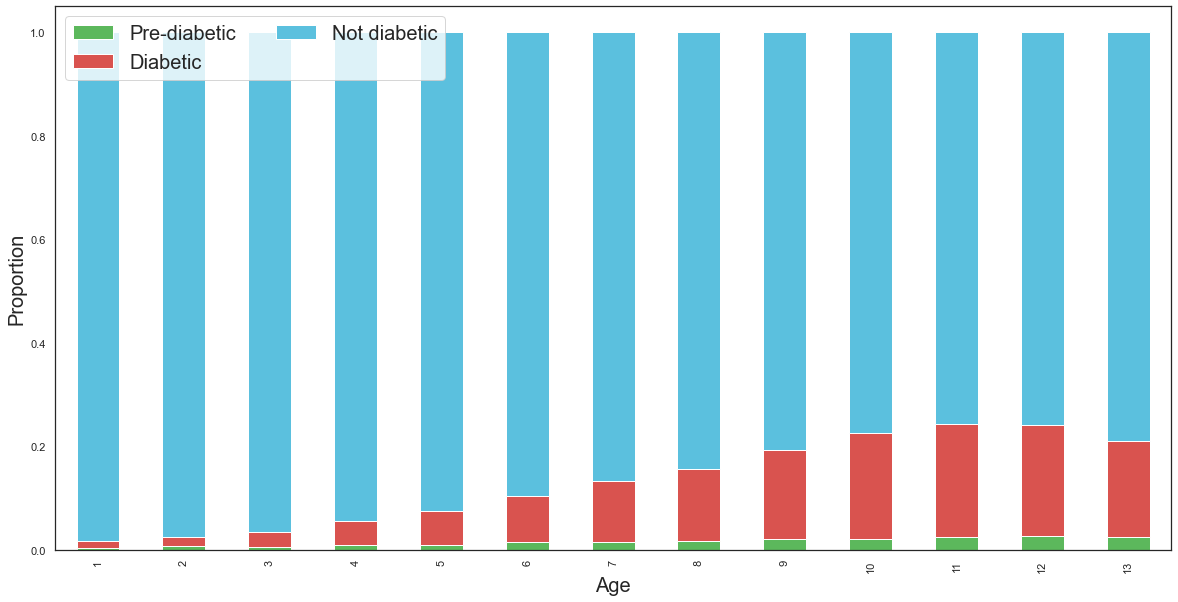

In [34]:
cross_tab_prop = pd.crosstab(index=dm_data['Age'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("age_diabetes_stacked_bar_graph.jpg", dpi=400)

In [35]:
cross_tab = pd.crosstab(index=dm_data['Age'],
                        columns=dm_data['Diabetes_012'])
cross_tab

Diabetes_012,0,1,2
Age,,,
1,5601,21,78
2,7404,54,140
3,10737,72,314
4,13055,142,626
5,14943,163,1051
6,17765,312,1742
7,22808,418,3088
8,26019,550,4263
9,26809,702,5733


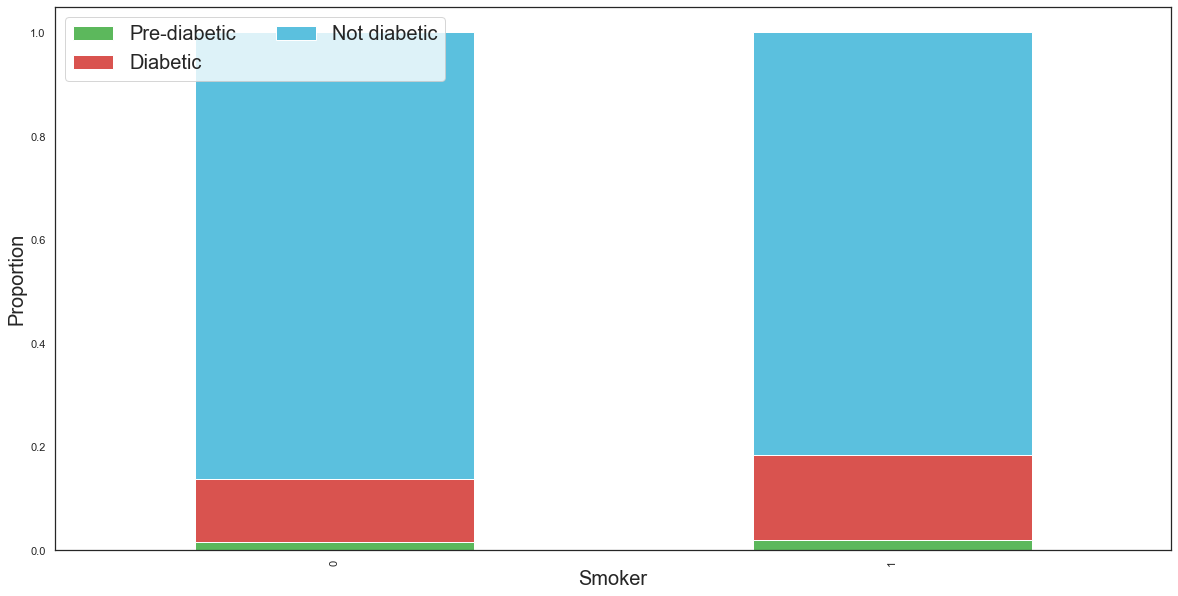

In [36]:
cross_tab_prop = pd.crosstab(index=dm_data['Smoker'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Smoker", fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.show()

In [37]:
cross_tab_prop

Diabetes_012,1,2,0
Smoker,,,
0,0.016629,0.120553,0.862817
1,0.020298,0.162929,0.816772


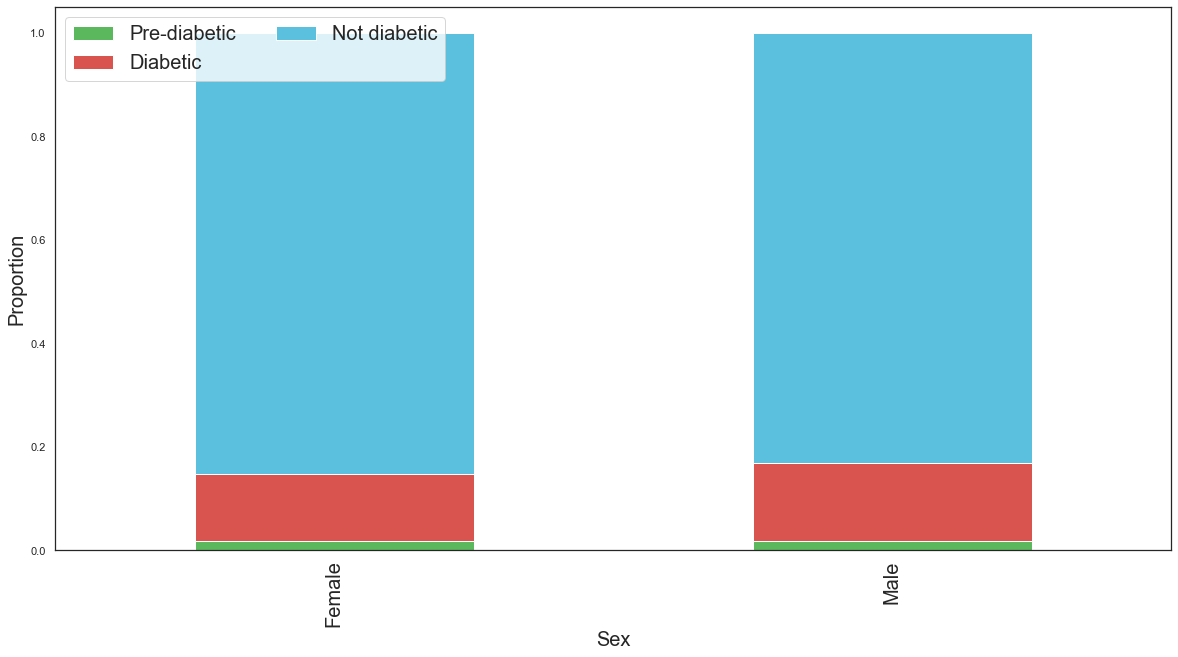

In [38]:
cross_tab_prop = pd.crosstab(index=dm_data['Sex'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Sex", fontsize=20)
plt.xticks([0,1],['Female', "Male"], fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.show()

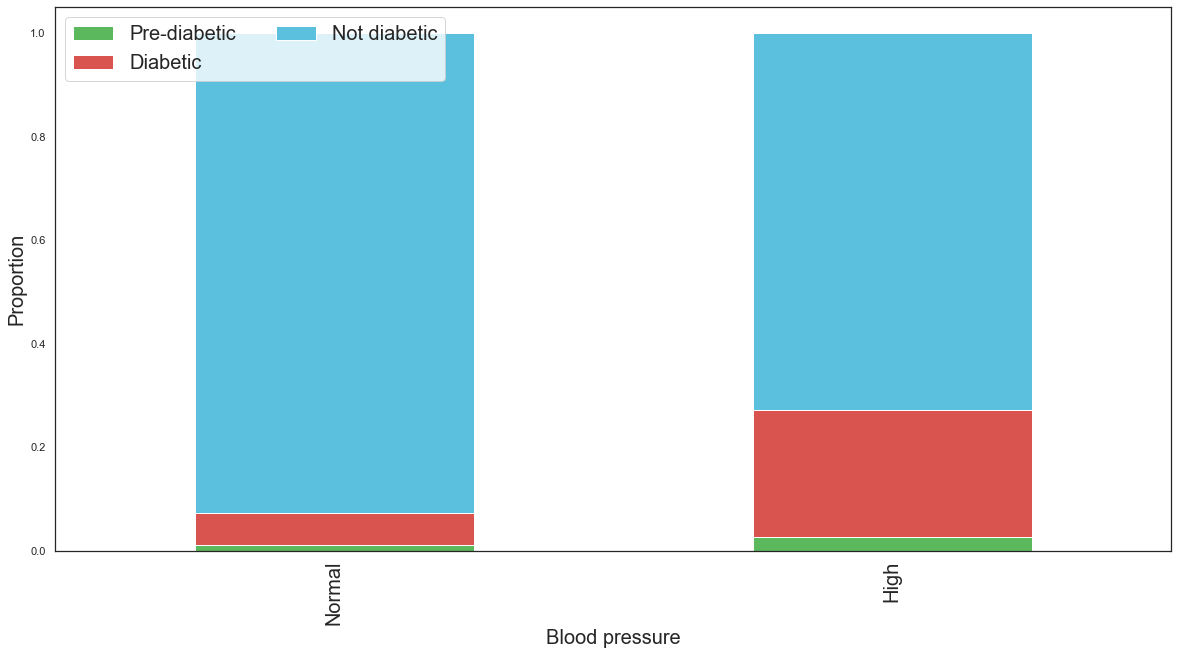

In [39]:
cross_tab_prop = pd.crosstab(index=dm_data['HighBP'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Blood pressure", fontsize=20)
plt.xticks([0,1],['Normal', "High"], fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.show()

Text(0, 0.5, 'Proportion')

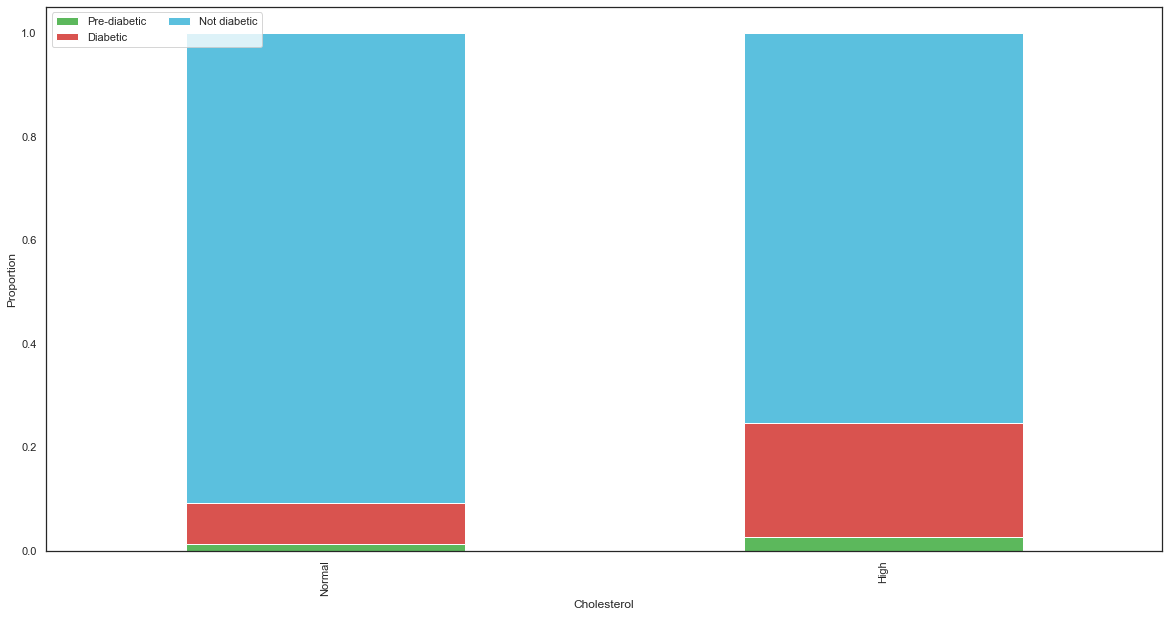

In [40]:
cross_tab_prop = pd.crosstab(index=dm_data['HighChol'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Cholesterol")
plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")


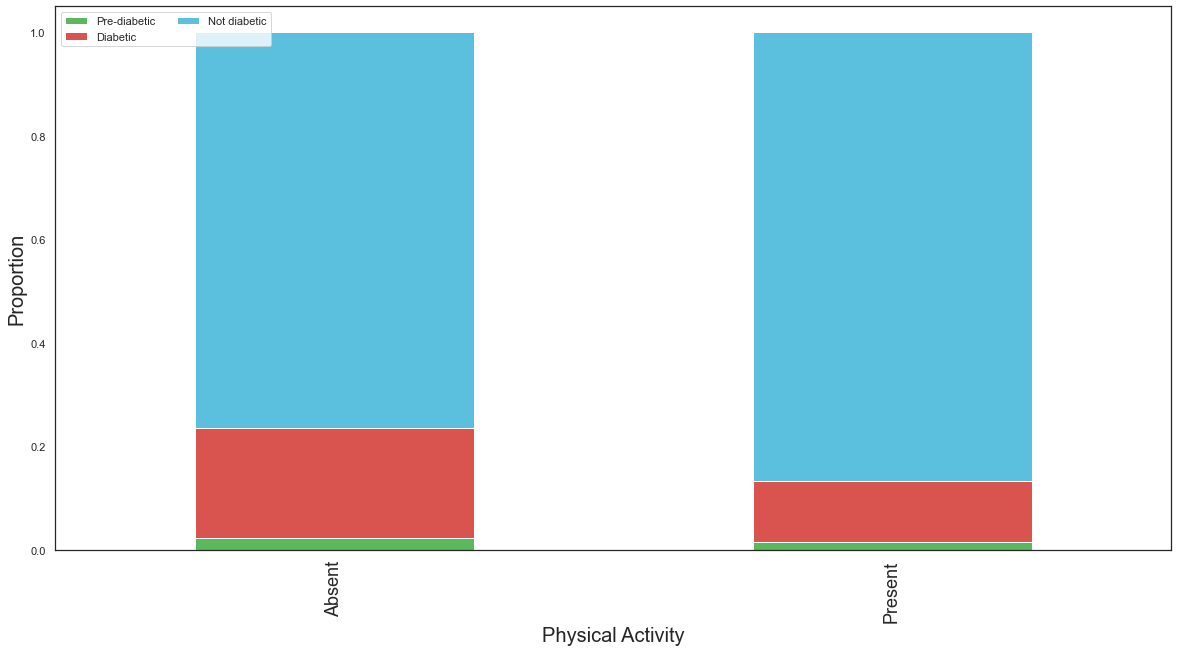

In [41]:
cross_tab_prop = pd.crosstab(index=dm_data['PhysActivity'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Physical Activity", fontsize=20)
plt.xticks([0,1],['Absent', "Present"], fontsize=18)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Phys_activity_diabetes_stacked_bar_graph.jpg", dpi=400)

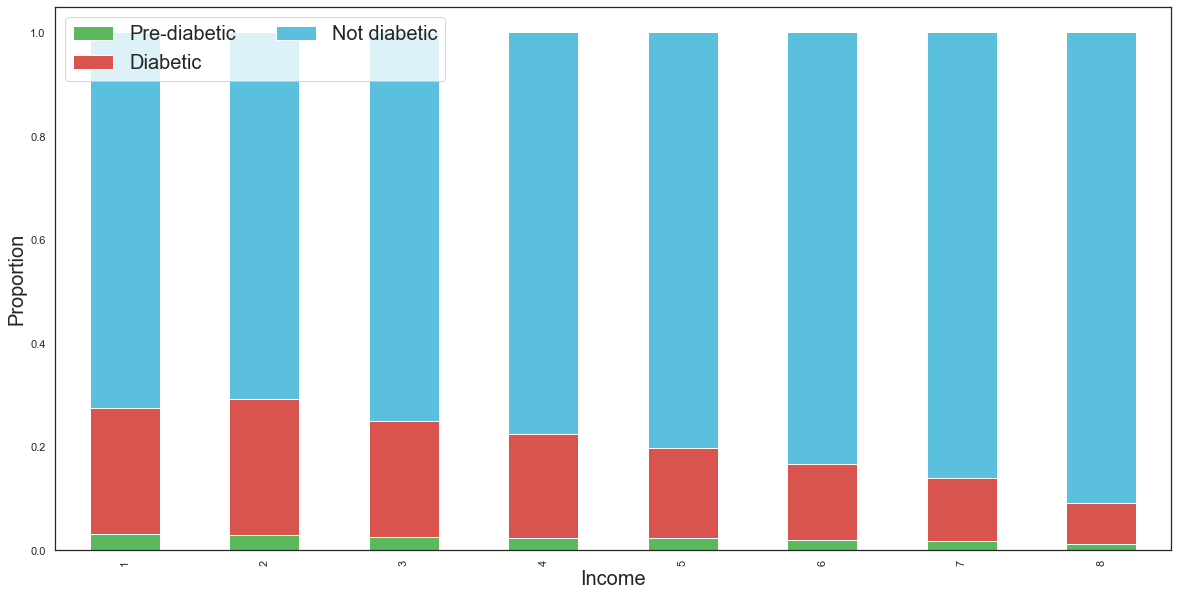

In [42]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income", fontsize=20)
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Income_diabetes_stacked_bar_graph.jpg", dpi=400)

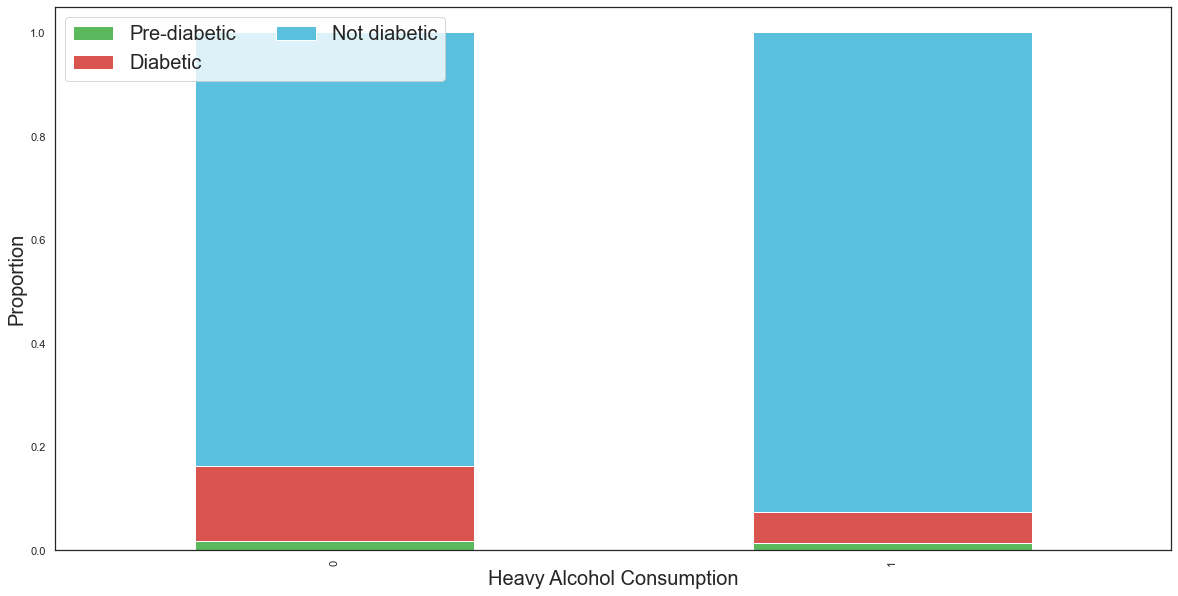

In [43]:
cross_tab_prop = pd.crosstab(index=dm_data['HvyAlcoholConsump'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Heavy Alcohol Consumption", fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Alcohol_diabetes_stacked_bar_graph.jpg", dpi=400)

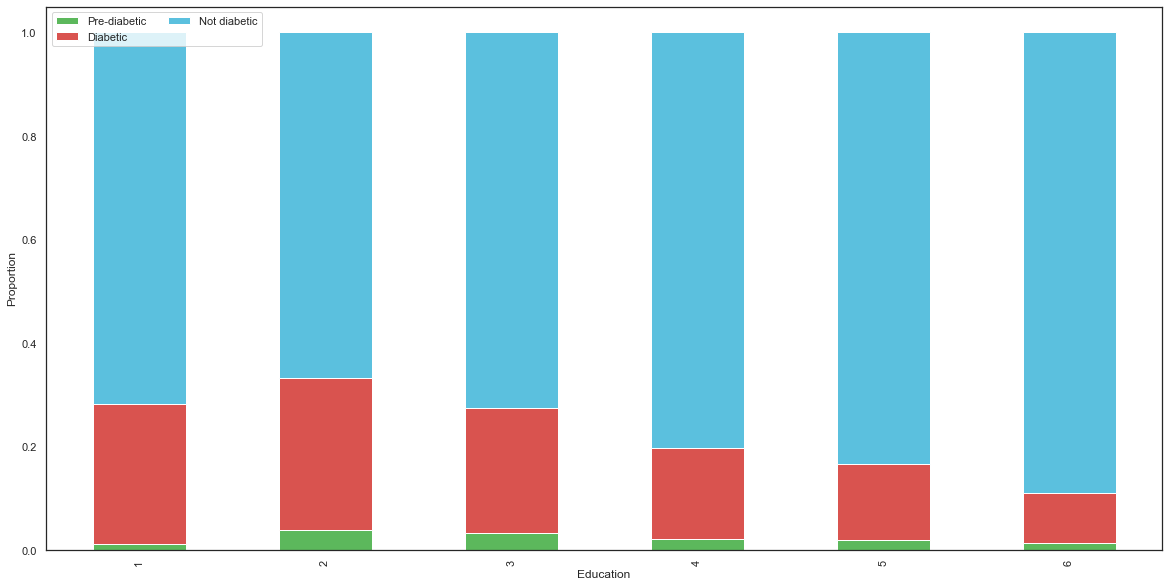

In [44]:
cross_tab_prop = pd.crosstab(index=dm_data['Education'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Education")
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")
plt.savefig("Education_diabetes_stacked_bar_graph.jpg")

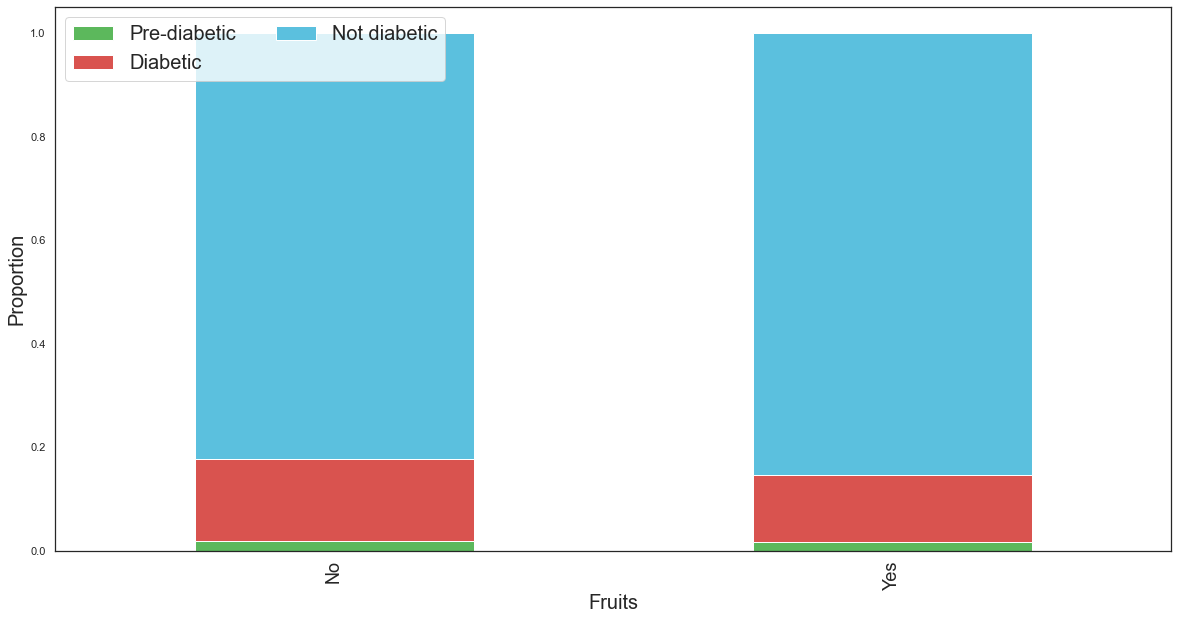

In [45]:
cross_tab_prop = pd.crosstab(index=dm_data['Fruits'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Fruits", fontsize=20)
plt.xticks([0,1],['No', "Yes"], fontsize=18)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Fruits_stacked_bar_graph.jpg", dpi=400)

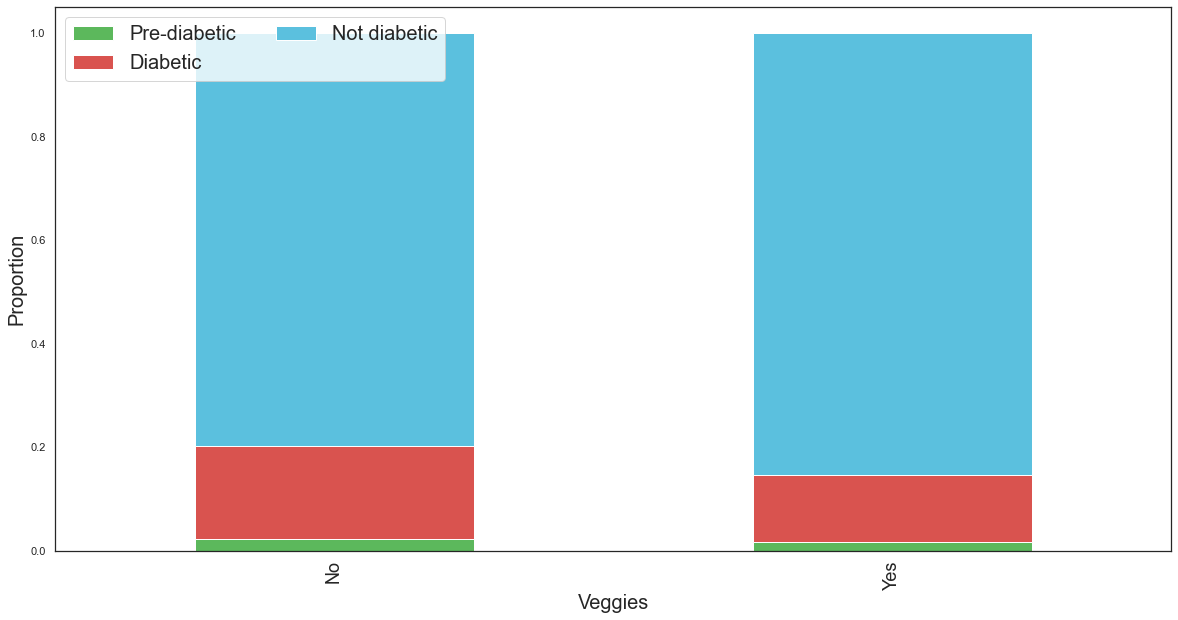

In [46]:
cross_tab_prop = pd.crosstab(index=dm_data['Veggies'],
                             columns=dm_data['Diabetes_012'],
                             normalize='index')
cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    #colormap='tab10', 
                    color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Veggies", fontsize=20)
plt.xticks([0,1],['No', "Yes"], fontsize=18)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Vegetables_stacked_bar_graph.jpg")

### Association of income and variables

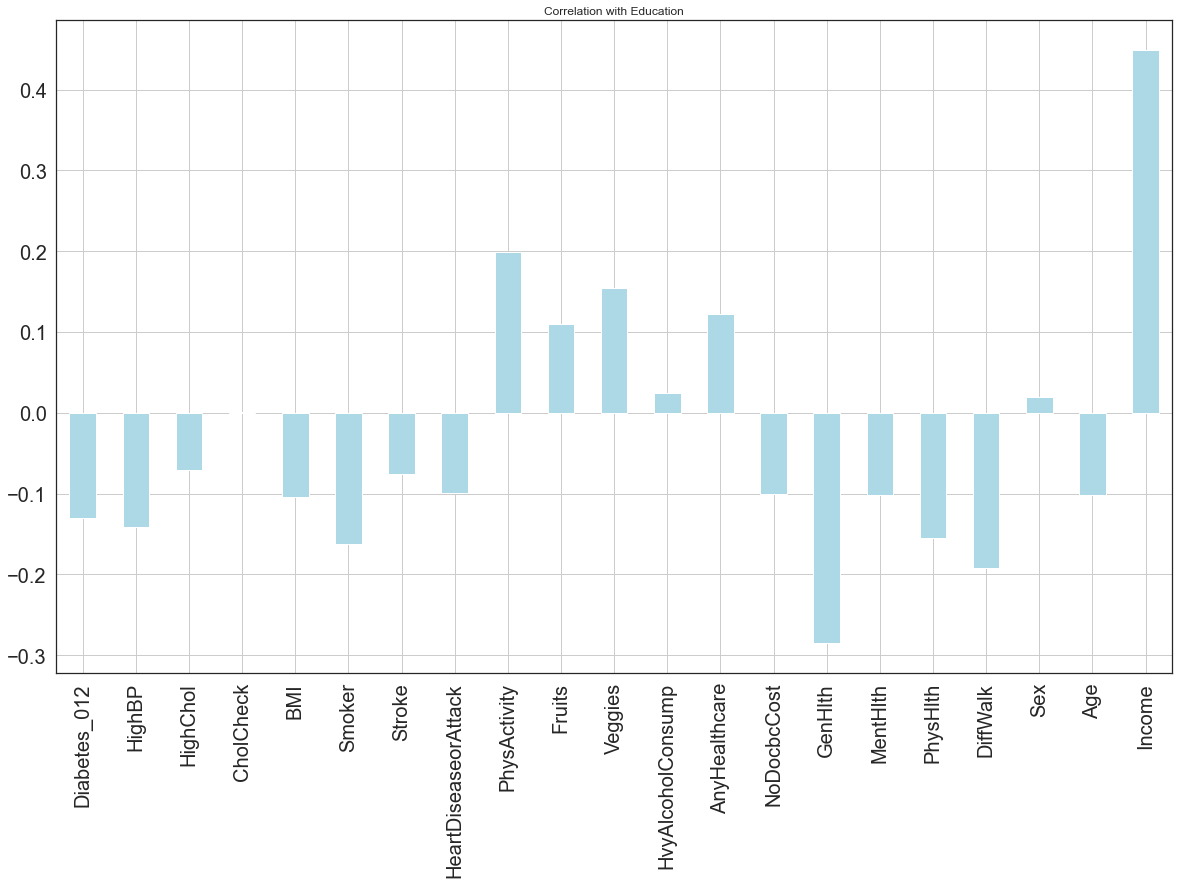

In [47]:
dm_data.drop('Education', axis=1).corrwith(dm_data.Education).plot(kind='bar', grid=True, fontsize=20, figsize=(20, 12), title="Correlation with Education", color="lightblue");


plt.savefig("pearson_correlation.with_Education.jpg", dpi=400)

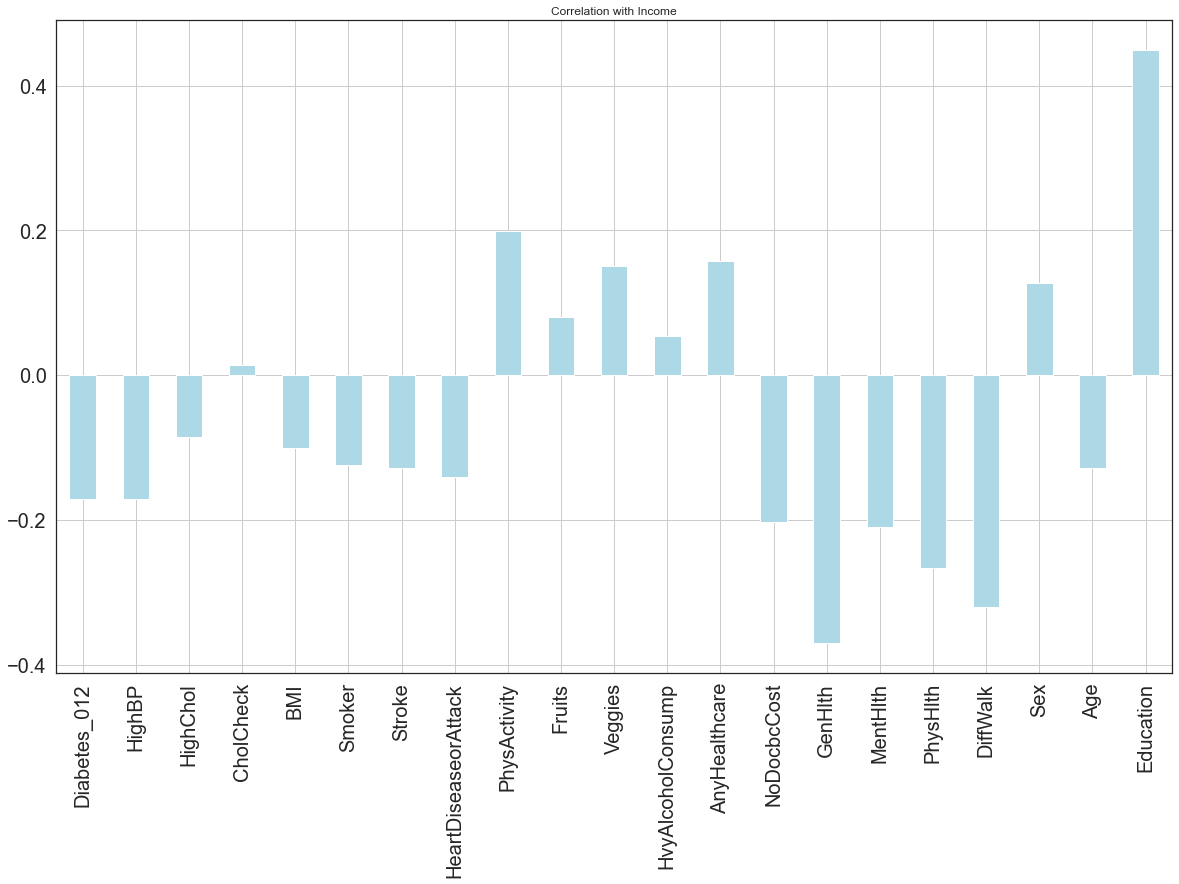

In [48]:
dm_data.drop('Income', axis=1).corrwith(dm_data.Income).plot(kind='bar', grid=True, fontsize=20, figsize=(20, 12), title="Correlation with Income", color="lightblue");


plt.savefig("pearson_correlation.with_Income.jpg", dpi=400)

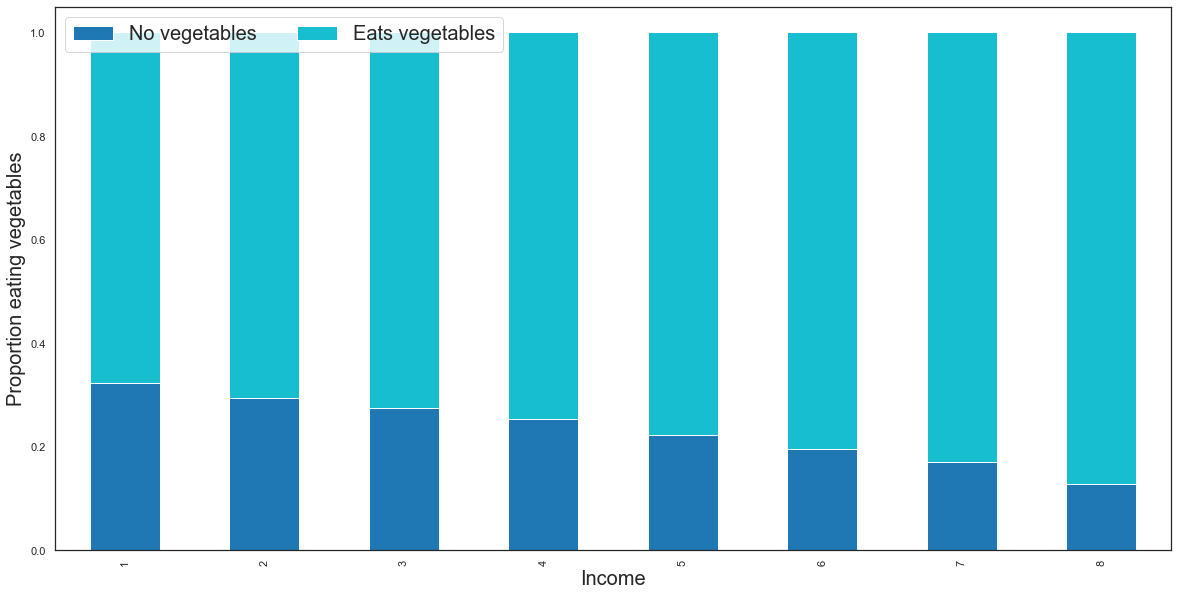

In [49]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['Veggies'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["No vegetables", "Eats vegetables"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income" , fontsize=20)
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion eating vegetables", fontsize=20)
plt.savefig("Vegetables_income_stacked_bar_graph.jpg", dpi=400)

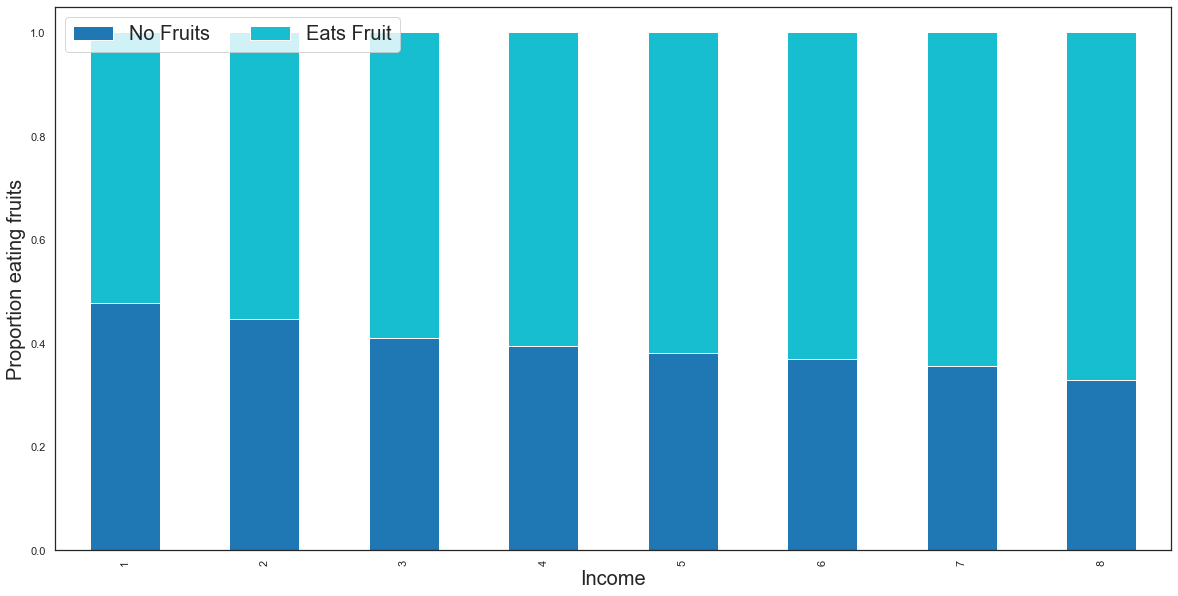

In [50]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['Fruits'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["No Fruits", "Eats Fruit"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income", fontsize=20)
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion eating fruits", fontsize=20)
plt.savefig("Fruits_income_stacked_bar_graph.jpg", dpi=400)

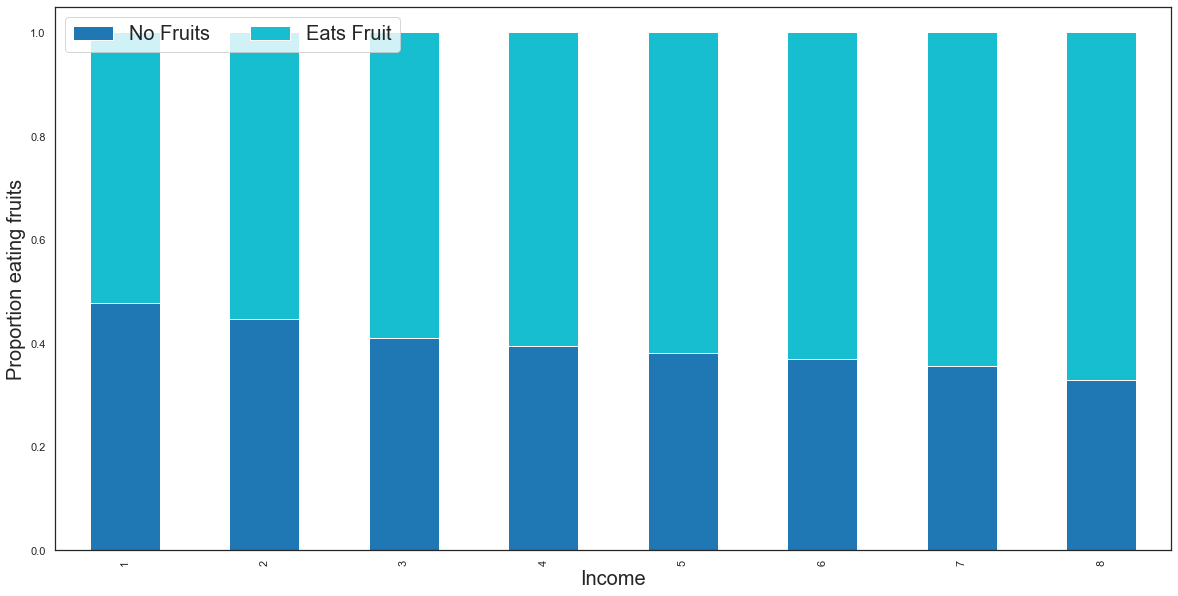

In [51]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['Fruits'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["No Fruits", "Eats Fruit"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income", fontsize=20)
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion eating fruits", fontsize=20)
plt.savefig("Fruits_income_stacked_bar_graph.jpg", dpi=400)

Text(0, 0.5, 'Proportion')

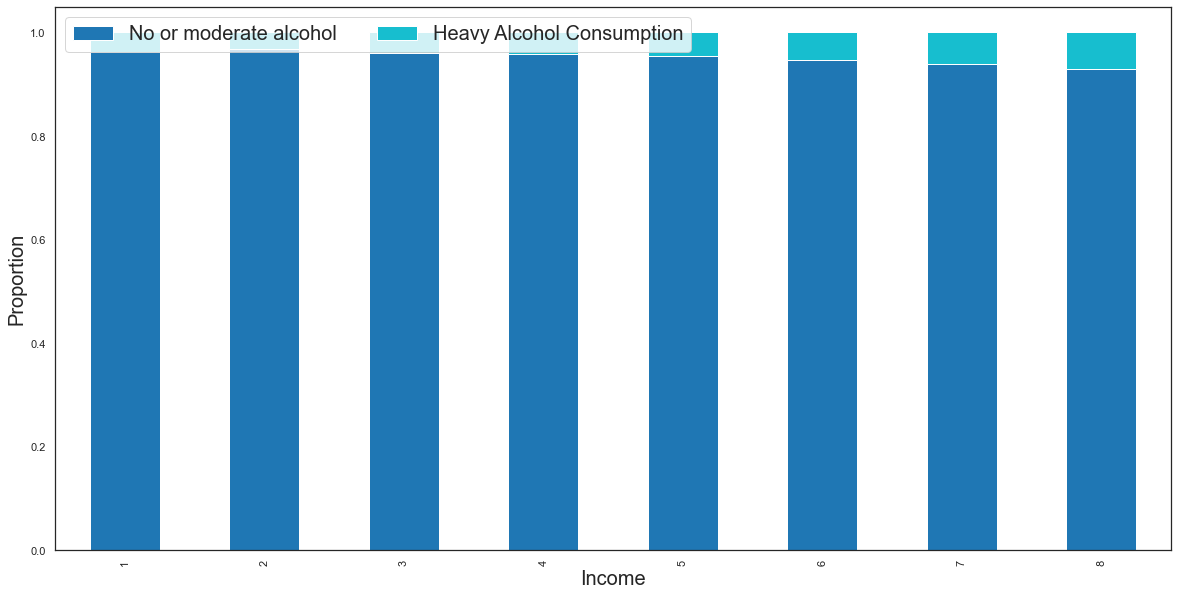

In [59]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['HvyAlcoholConsump'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["No or moderate alcohol", "Heavy Alcohol Consumption"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income", fontsize=20)
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion", fontsize=20)
#plt.savefig("Fruits_income_stacked_bar_graph.jpg", dpi=400)

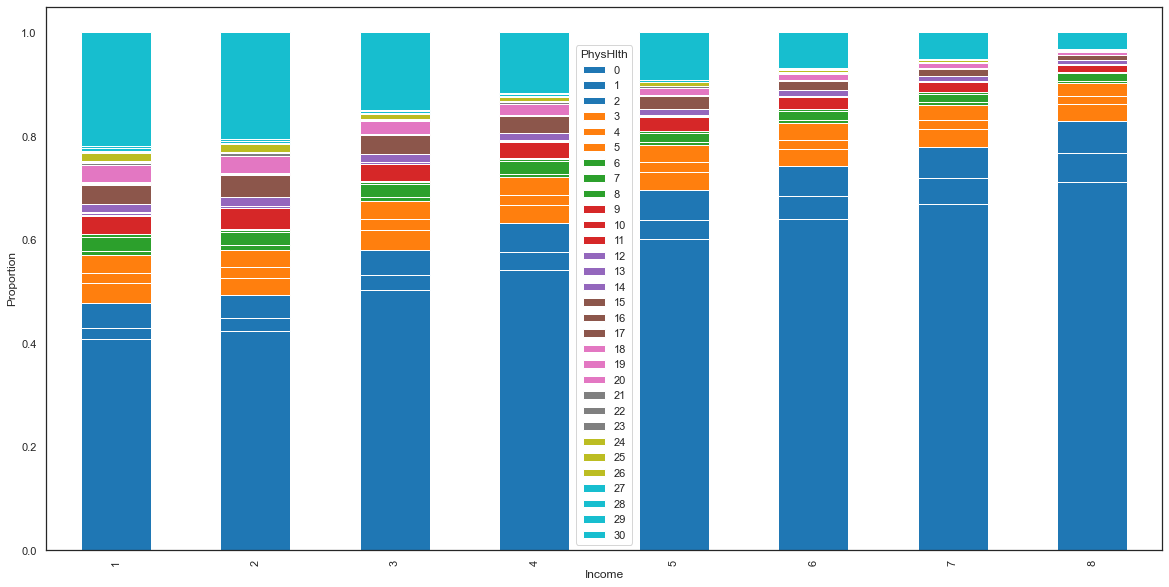

In [53]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['PhysHlth'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

#plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Income")
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")
plt.savefig("Phys_health_income_stacked_bar_graph.jpg")

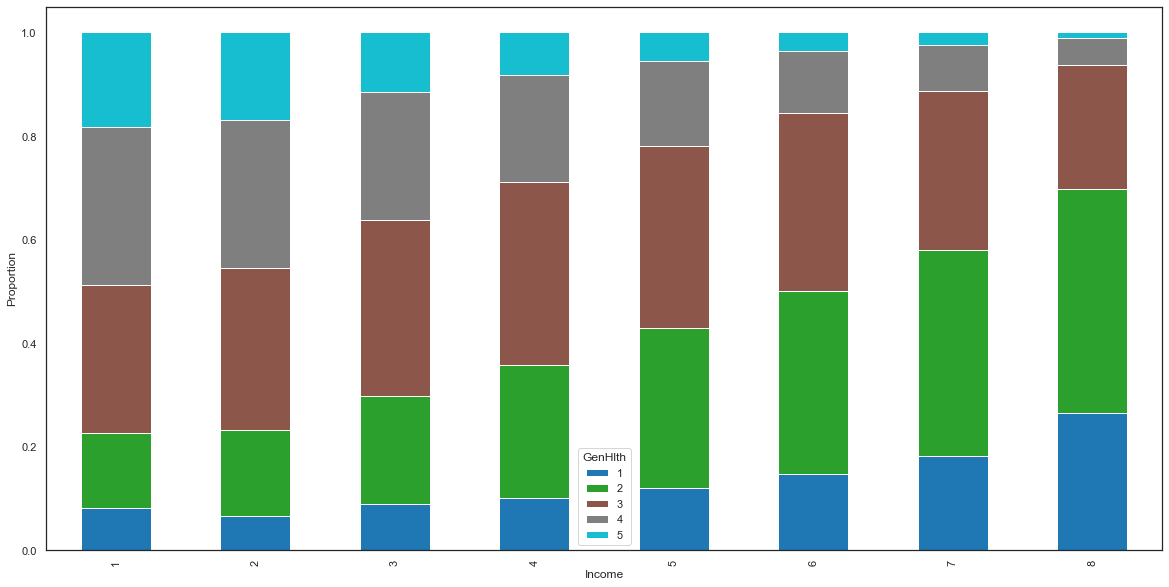

In [54]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['GenHlth'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

#plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Income")
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")
plt.savefig("Gen_health_income_stacked_bar_graph.jpg")

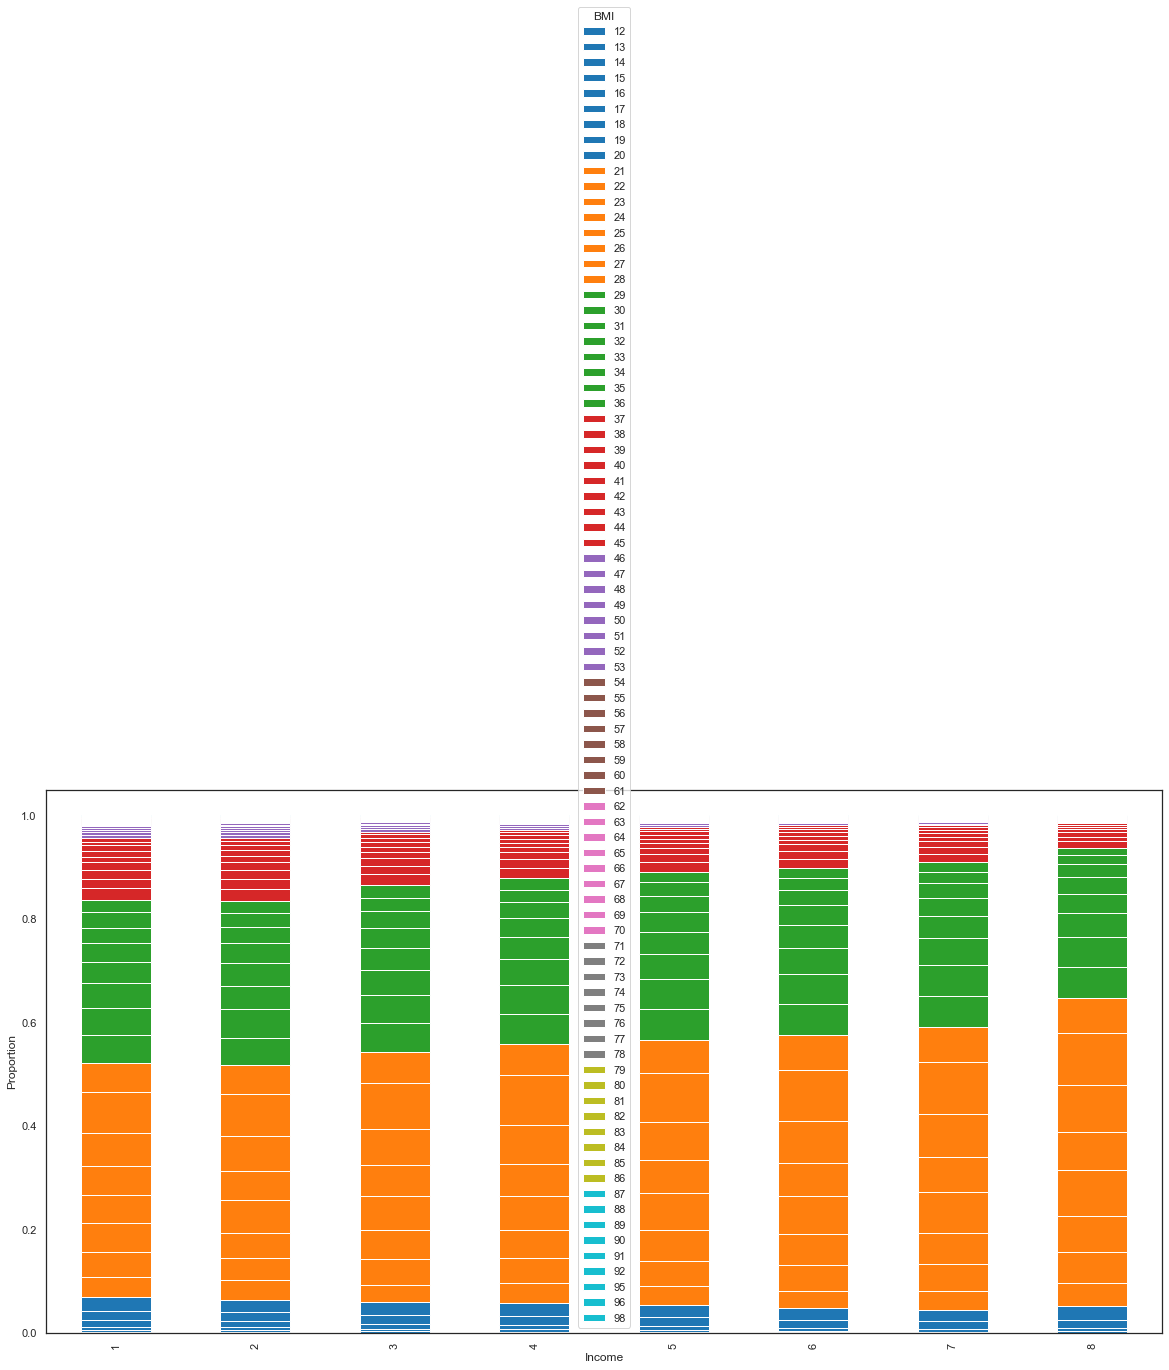

In [55]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['BMI'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

#plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Income")
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")
plt.savefig("BMI_income_stacked_bar_graph.jpg")

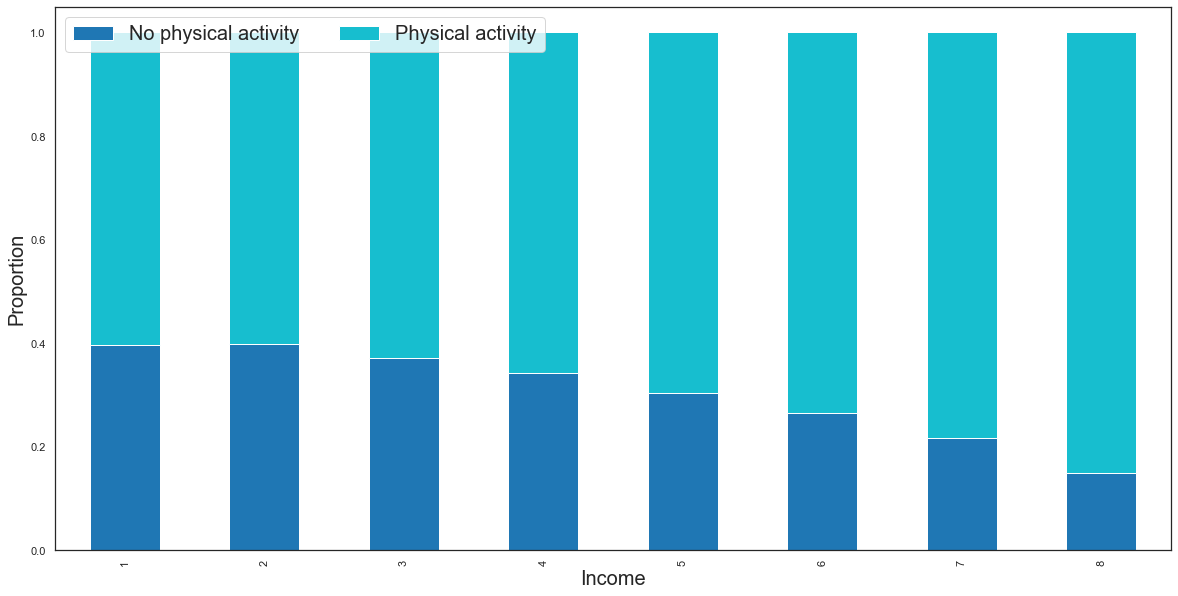

In [56]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['PhysActivity'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

plt.legend(["No physical activity", "Physical activity"], loc="upper left", ncol=2, fontsize=20)
plt.xlabel("Income", fontsize=20)
#plt.xticks([0,1],['No physical activity', "Physical activity"], fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.savefig("Phys_activity_income_stacked_bar_graph.jpg", dpi=400)

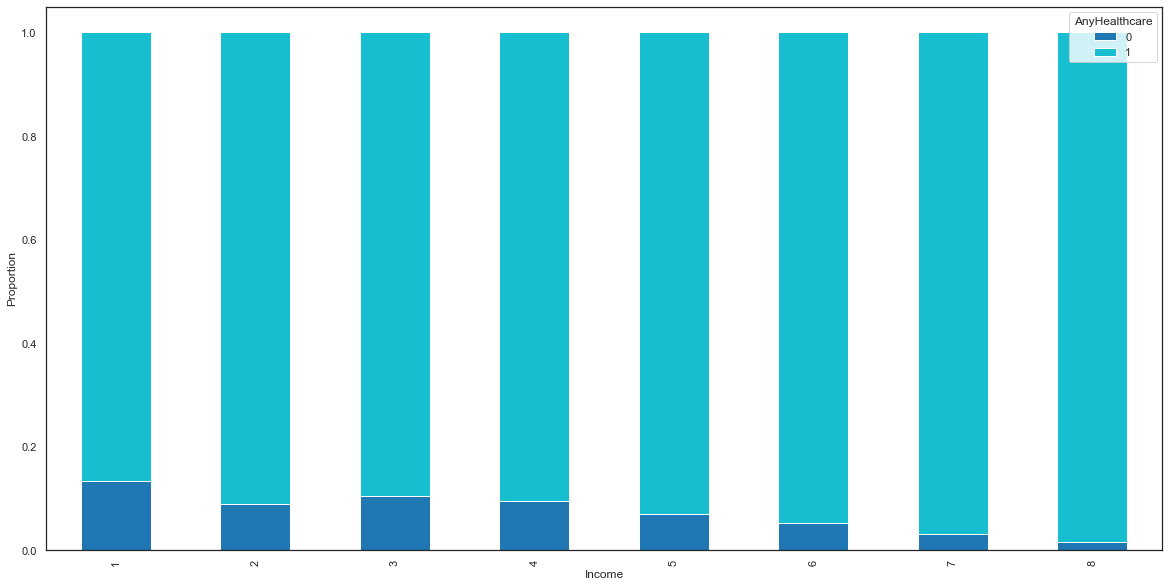

In [57]:
cross_tab_prop = pd.crosstab(index=dm_data['Income'],
                             columns=dm_data['AnyHealthcare'],
                             normalize='index')
#cross_tab_prop = cross_tab_prop[[1,2,0]]

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    #color=['#5cb85c','#d9534f', '#5bc0de'],
                    figsize=(20, 10))

#plt.legend(["Pre-diabetic", "Diabetic", "Not diabetic"], loc="upper left", ncol=2)
plt.xlabel("Income")
#plt.xticks([0,1],['Normal', "High"])
plt.ylabel("Proportion")
plt.savefig("Any_healthcare_income_stacked_bar_graph.jpg")